In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
res=list(zip(*lat_lngs))

In [5]:
print ("Modified list is : " + str(res))

Modified list is : []


In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8eda0f82b697d090d47d4b19ac1e59ef


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabedelo
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | poya
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | turukhansk
Processing Record 6 of Set 1 | stornoway
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | mitu
Processing Record 13 of Set 1 | santa marta
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | aizkraukle
Processing Record 21 of Set 1 | makakilo city
Processing Record 22 of Set 1 | eyl
Proces

KeyboardInterrupt: 

In [17]:
len(city_data)

134

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabedelo,-6.9811,-34.8339,81.27,75,10,11.70,BR,2022-01-20 21:51:16
1,Port Elizabeth,-33.9180,25.5701,71.10,88,0,23.02,ZA,2022-01-20 21:51:17
2,Poya,-21.3500,165.1500,82.51,75,90,5.97,NC,2022-01-20 21:51:17
3,Atuona,-9.8000,-139.0333,78.80,76,45,23.47,PF,2022-01-20 21:51:19
4,Turukhansk,65.8167,87.9833,5.76,95,100,15.59,RU,2022-01-20 21:51:22
5,Stornoway,58.2093,-6.3865,40.96,92,75,1.99,GB,2022-01-20 21:51:22
6,Jamestown,42.0970,-79.2353,16.09,44,100,13.80,US,2022-01-20 21:46:35
7,Kahului,20.8947,-156.4700,80.62,72,40,6.91,US,2022-01-20 21:51:23
8,Hamilton,39.1834,-84.5333,27.45,52,40,1.01,US,2022-01-20 21:51:24
9,Bredasdorp,-34.5322,20.0403,60.12,82,0,3.44,ZA,2022-01-20 21:51:25


In [19]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabedelo,BR,2022-01-20 21:51:16,-6.9811,-34.8339,81.27,75,10,11.70
1,Port Elizabeth,ZA,2022-01-20 21:51:17,-33.9180,25.5701,71.10,88,0,23.02
2,Poya,NC,2022-01-20 21:51:17,-21.3500,165.1500,82.51,75,90,5.97
3,Atuona,PF,2022-01-20 21:51:19,-9.8000,-139.0333,78.80,76,45,23.47
4,Turukhansk,RU,2022-01-20 21:51:22,65.8167,87.9833,5.76,95,100,15.59
5,Stornoway,GB,2022-01-20 21:51:22,58.2093,-6.3865,40.96,92,75,1.99
6,Jamestown,US,2022-01-20 21:46:35,42.0970,-79.2353,16.09,44,100,13.80
7,Kahului,US,2022-01-20 21:51:23,20.8947,-156.4700,80.62,72,40,6.91
8,Hamilton,US,2022-01-20 21:51:24,39.1834,-84.5333,27.45,52,40,1.01
9,Bredasdorp,ZA,2022-01-20 21:51:25,-34.5322,20.0403,60.12,82,0,3.44


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

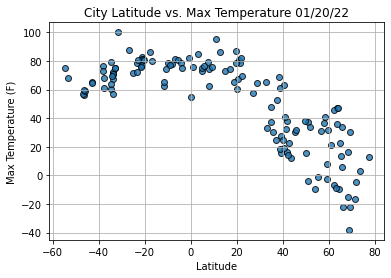

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

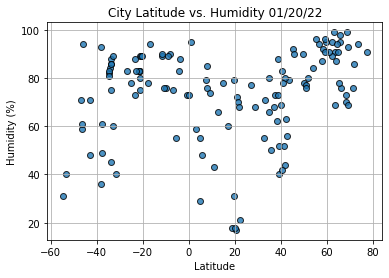

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

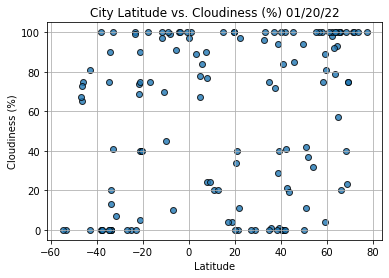

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

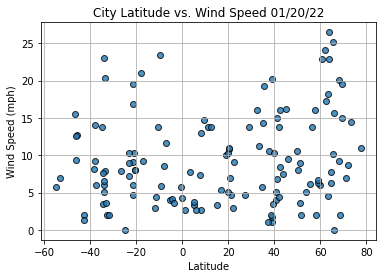

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City               Saint-Philippe
Country                        RE
Date          2022-01-20 21:51:28
Lat                      -21.3585
Lng                       55.7679
Max Temp                    76.59
Humidity                       83
Cloudiness                     74
Wind Speed                   9.08
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
129    False
130     True
131     True
132    False
133     True
Name: Lat, Length: 134, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Turukhansk,RU,2022-01-20 21:51:22,65.8167,87.9833,5.76,95,100,15.59
5,Stornoway,GB,2022-01-20 21:51:22,58.2093,-6.3865,40.96,92,75,1.99
6,Jamestown,US,2022-01-20 21:46:35,42.0970,-79.2353,16.09,44,100,13.80
7,Kahului,US,2022-01-20 21:51:23,20.8947,-156.4700,80.62,72,40,6.91
8,Hamilton,US,2022-01-20 21:51:24,39.1834,-84.5333,27.45,52,40,1.01


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

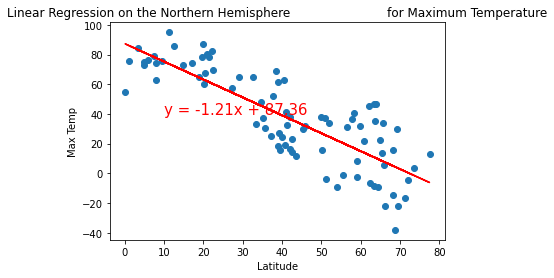

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

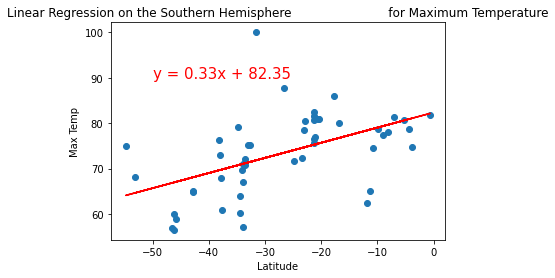

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

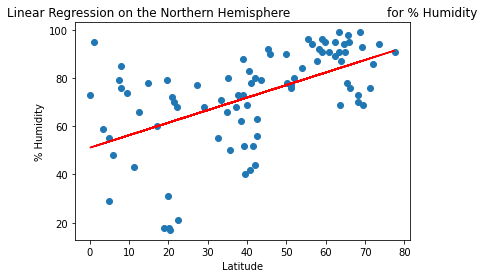

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

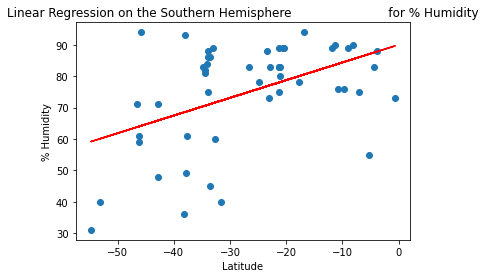

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

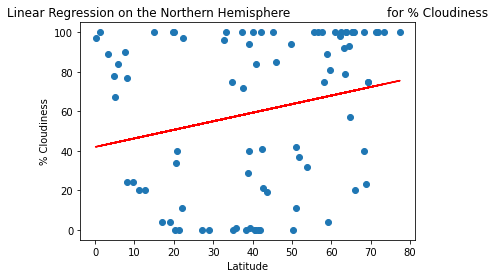

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

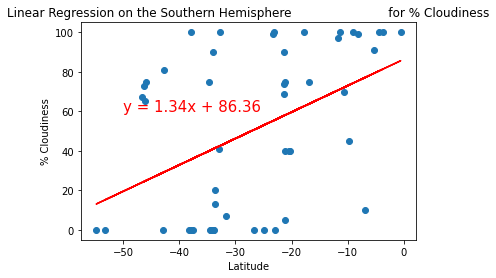

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

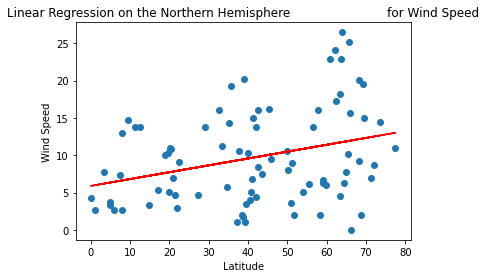

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

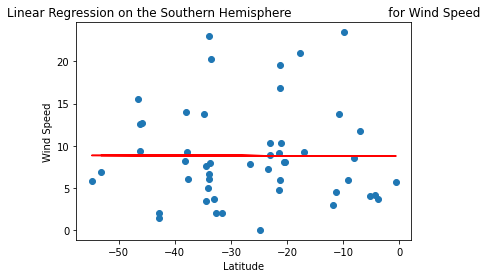

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))